In [47]:
# Import Necessary Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pylab import rcParams

# Import Model Selection and Machine Learning Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 15
sns.set_style('whitegrid')

In [4]:
# Import dataset
data = pd.read_csv('dataset.csv')

data.head(5)

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92      1065  
1             4.38  1.05                          3.40      1050  
2             5.68  1.03                          3.17      1185  
3             7.80  0.86                          3.45      1480  
4             4.32  1.04                          2.93       735

In [5]:
data.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [62]:
data.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [6]:
data.describe()

class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines     Proline   
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [85]:
new_val = {1:0, 2:1, 3:2}
data['class'] = data['class'].replace(new_val)
data['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

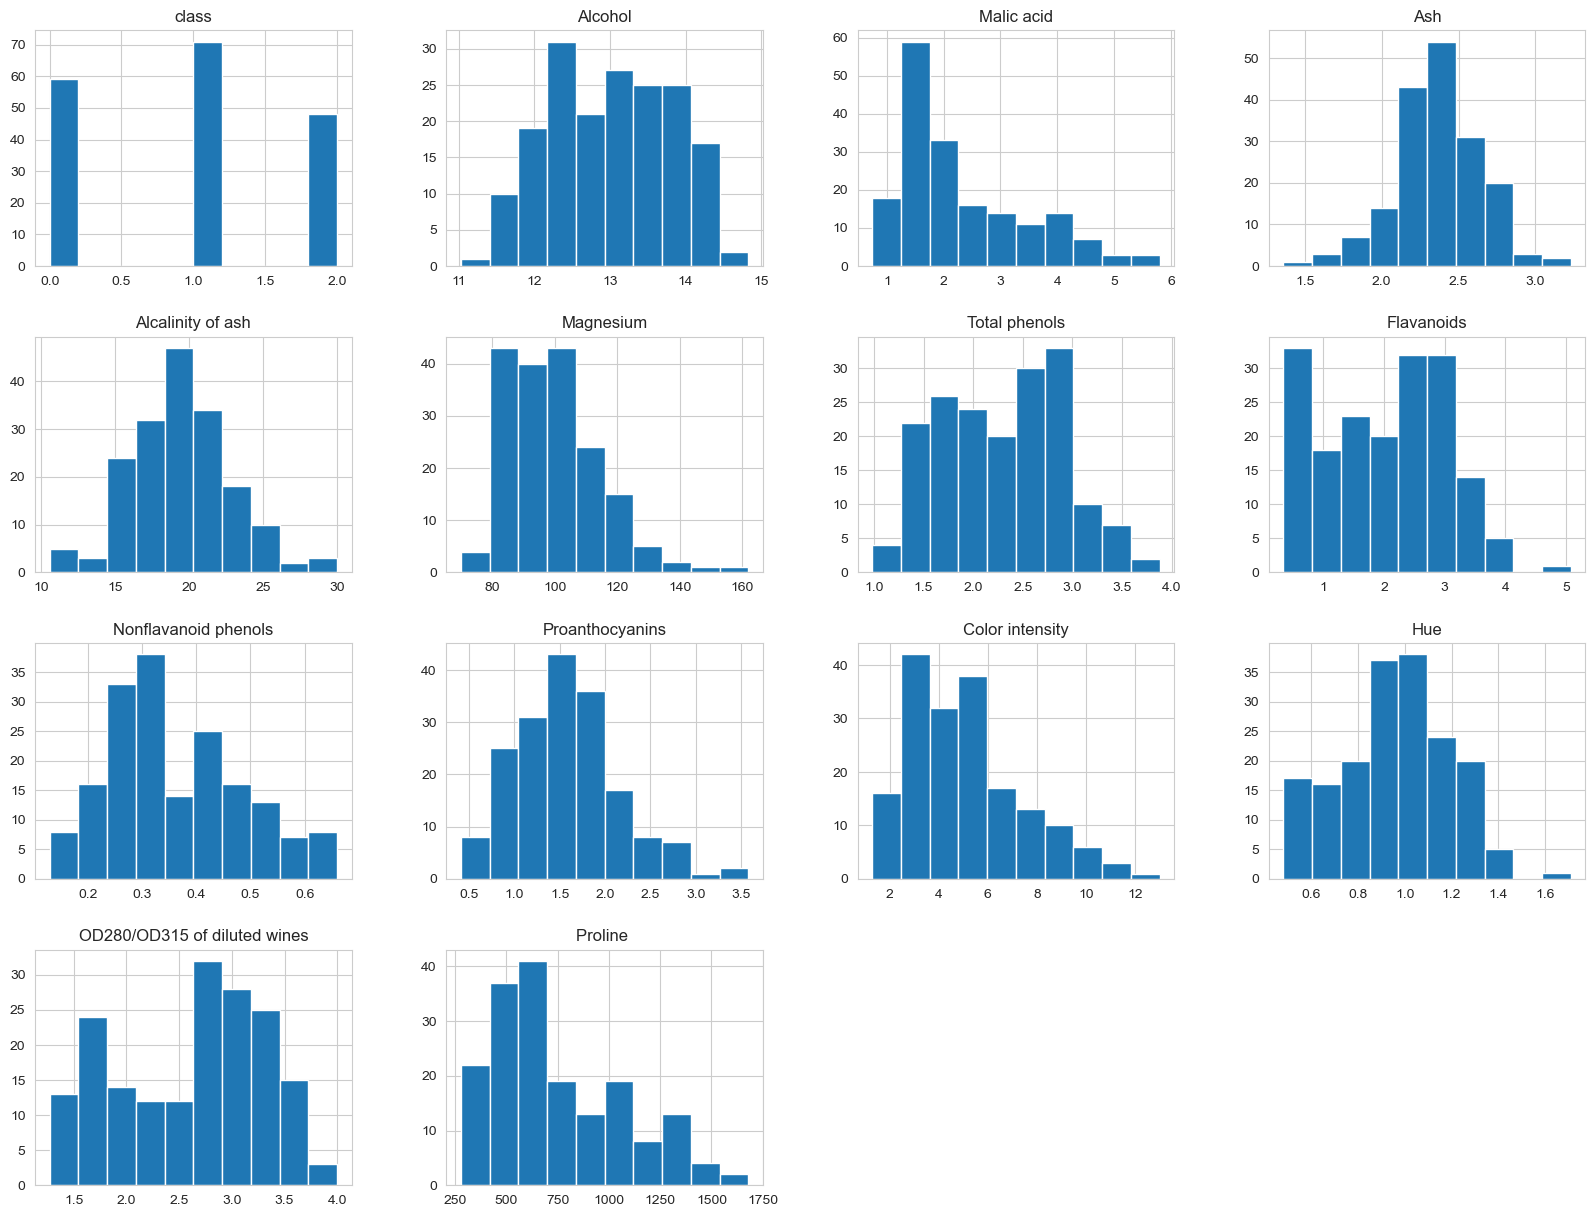

In [81]:
# Visualize the distributiion of individual features with histograms
data.hist(bins=10, figsize=(20, 15))
plt.show()

We can see that most features follow a Normal Distribution with some being slightly skewed, most likely some outliers causing this. We will look at correlation plots and boxplots to determine the relationships between features and if outliers are present.

In [82]:
# Split up features and target column
X = data.iloc[:,1:]
y = data.iloc[:,0]

<AxesSubplot:>

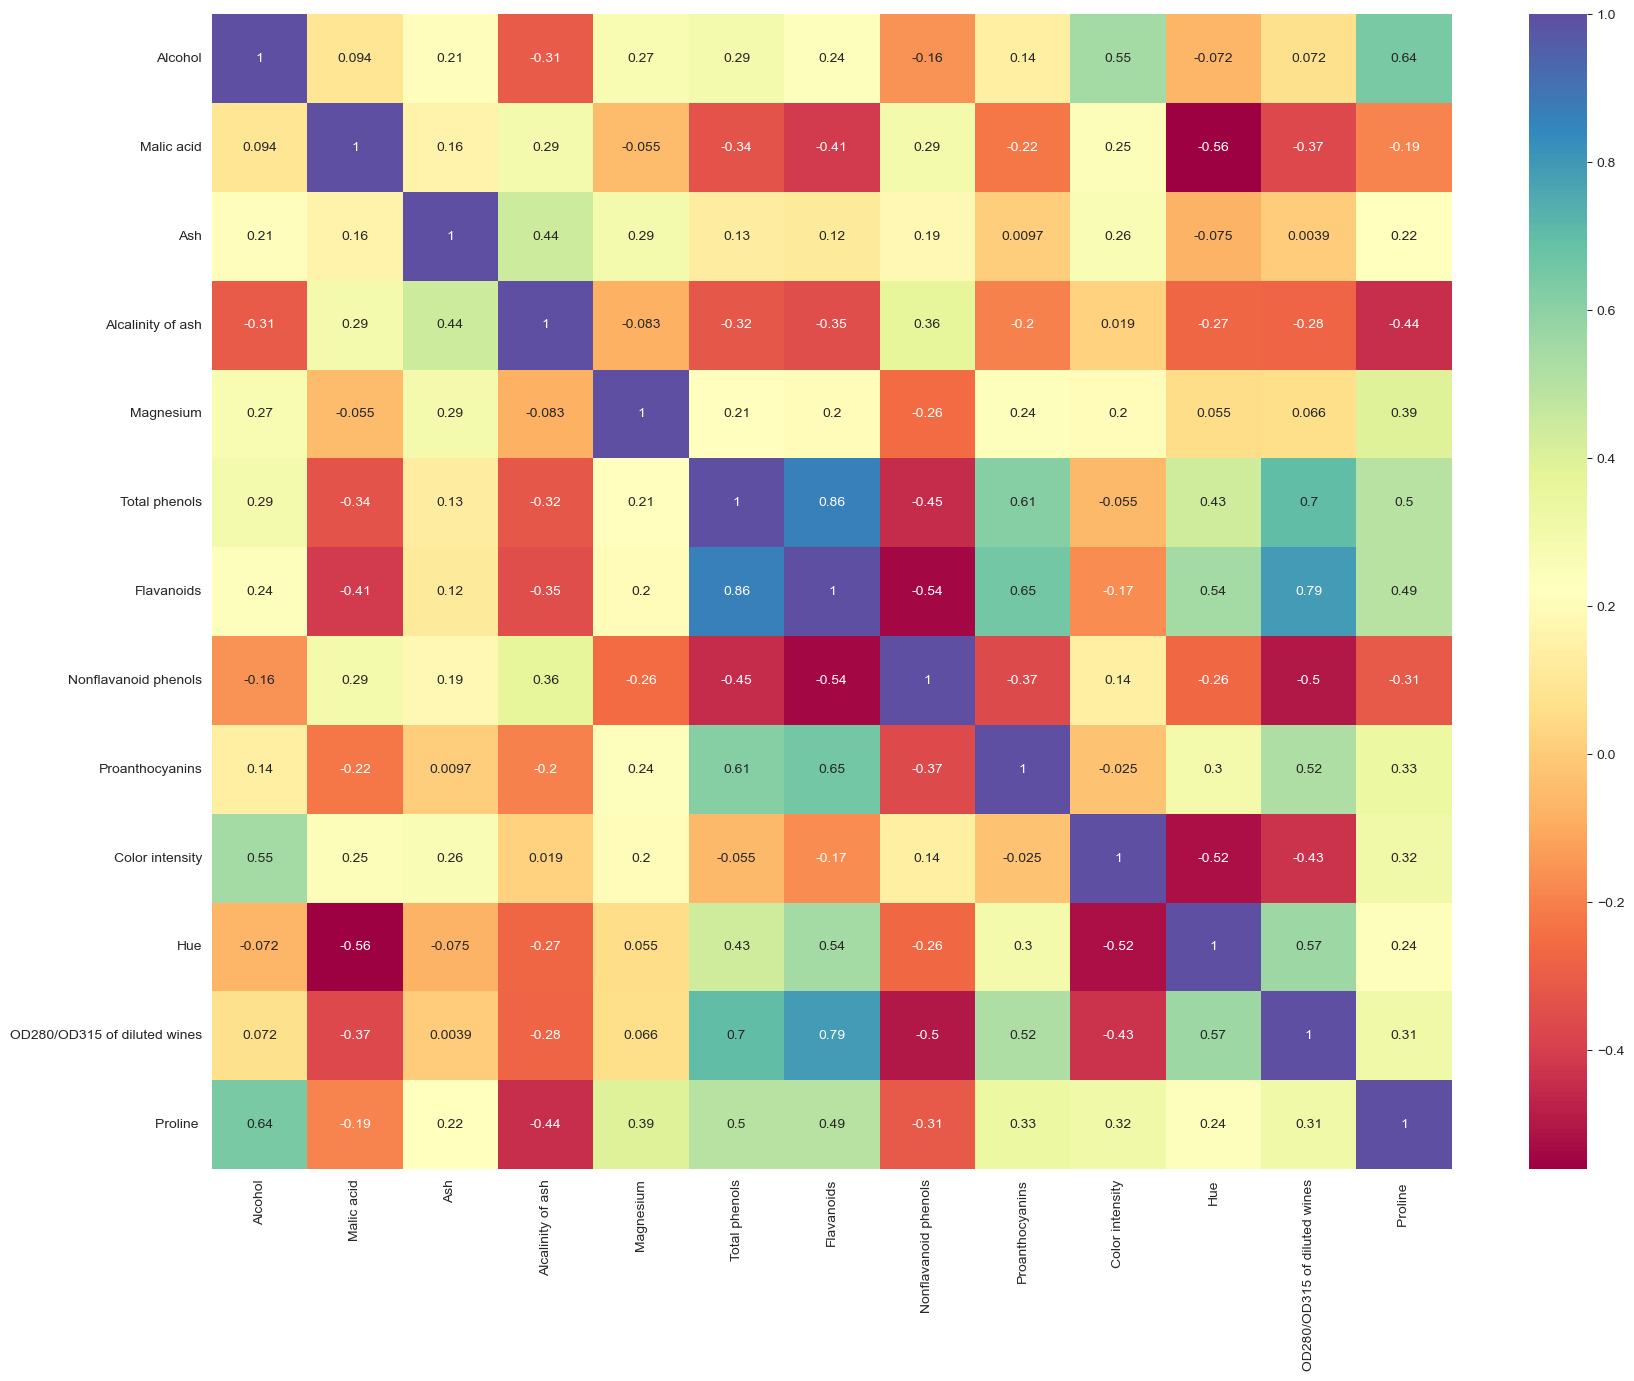

In [83]:
# Plot Correlation Heatmap
corr = X.corr(method = 'pearson')
sns.heatmap(corr, cmap='Spectral', annot=True)

Some of the correlation plots show high negative and positive correlations, the darker red squares denote strong negative correlations and the darker blue/green to purple squares denote strong positive correlations.

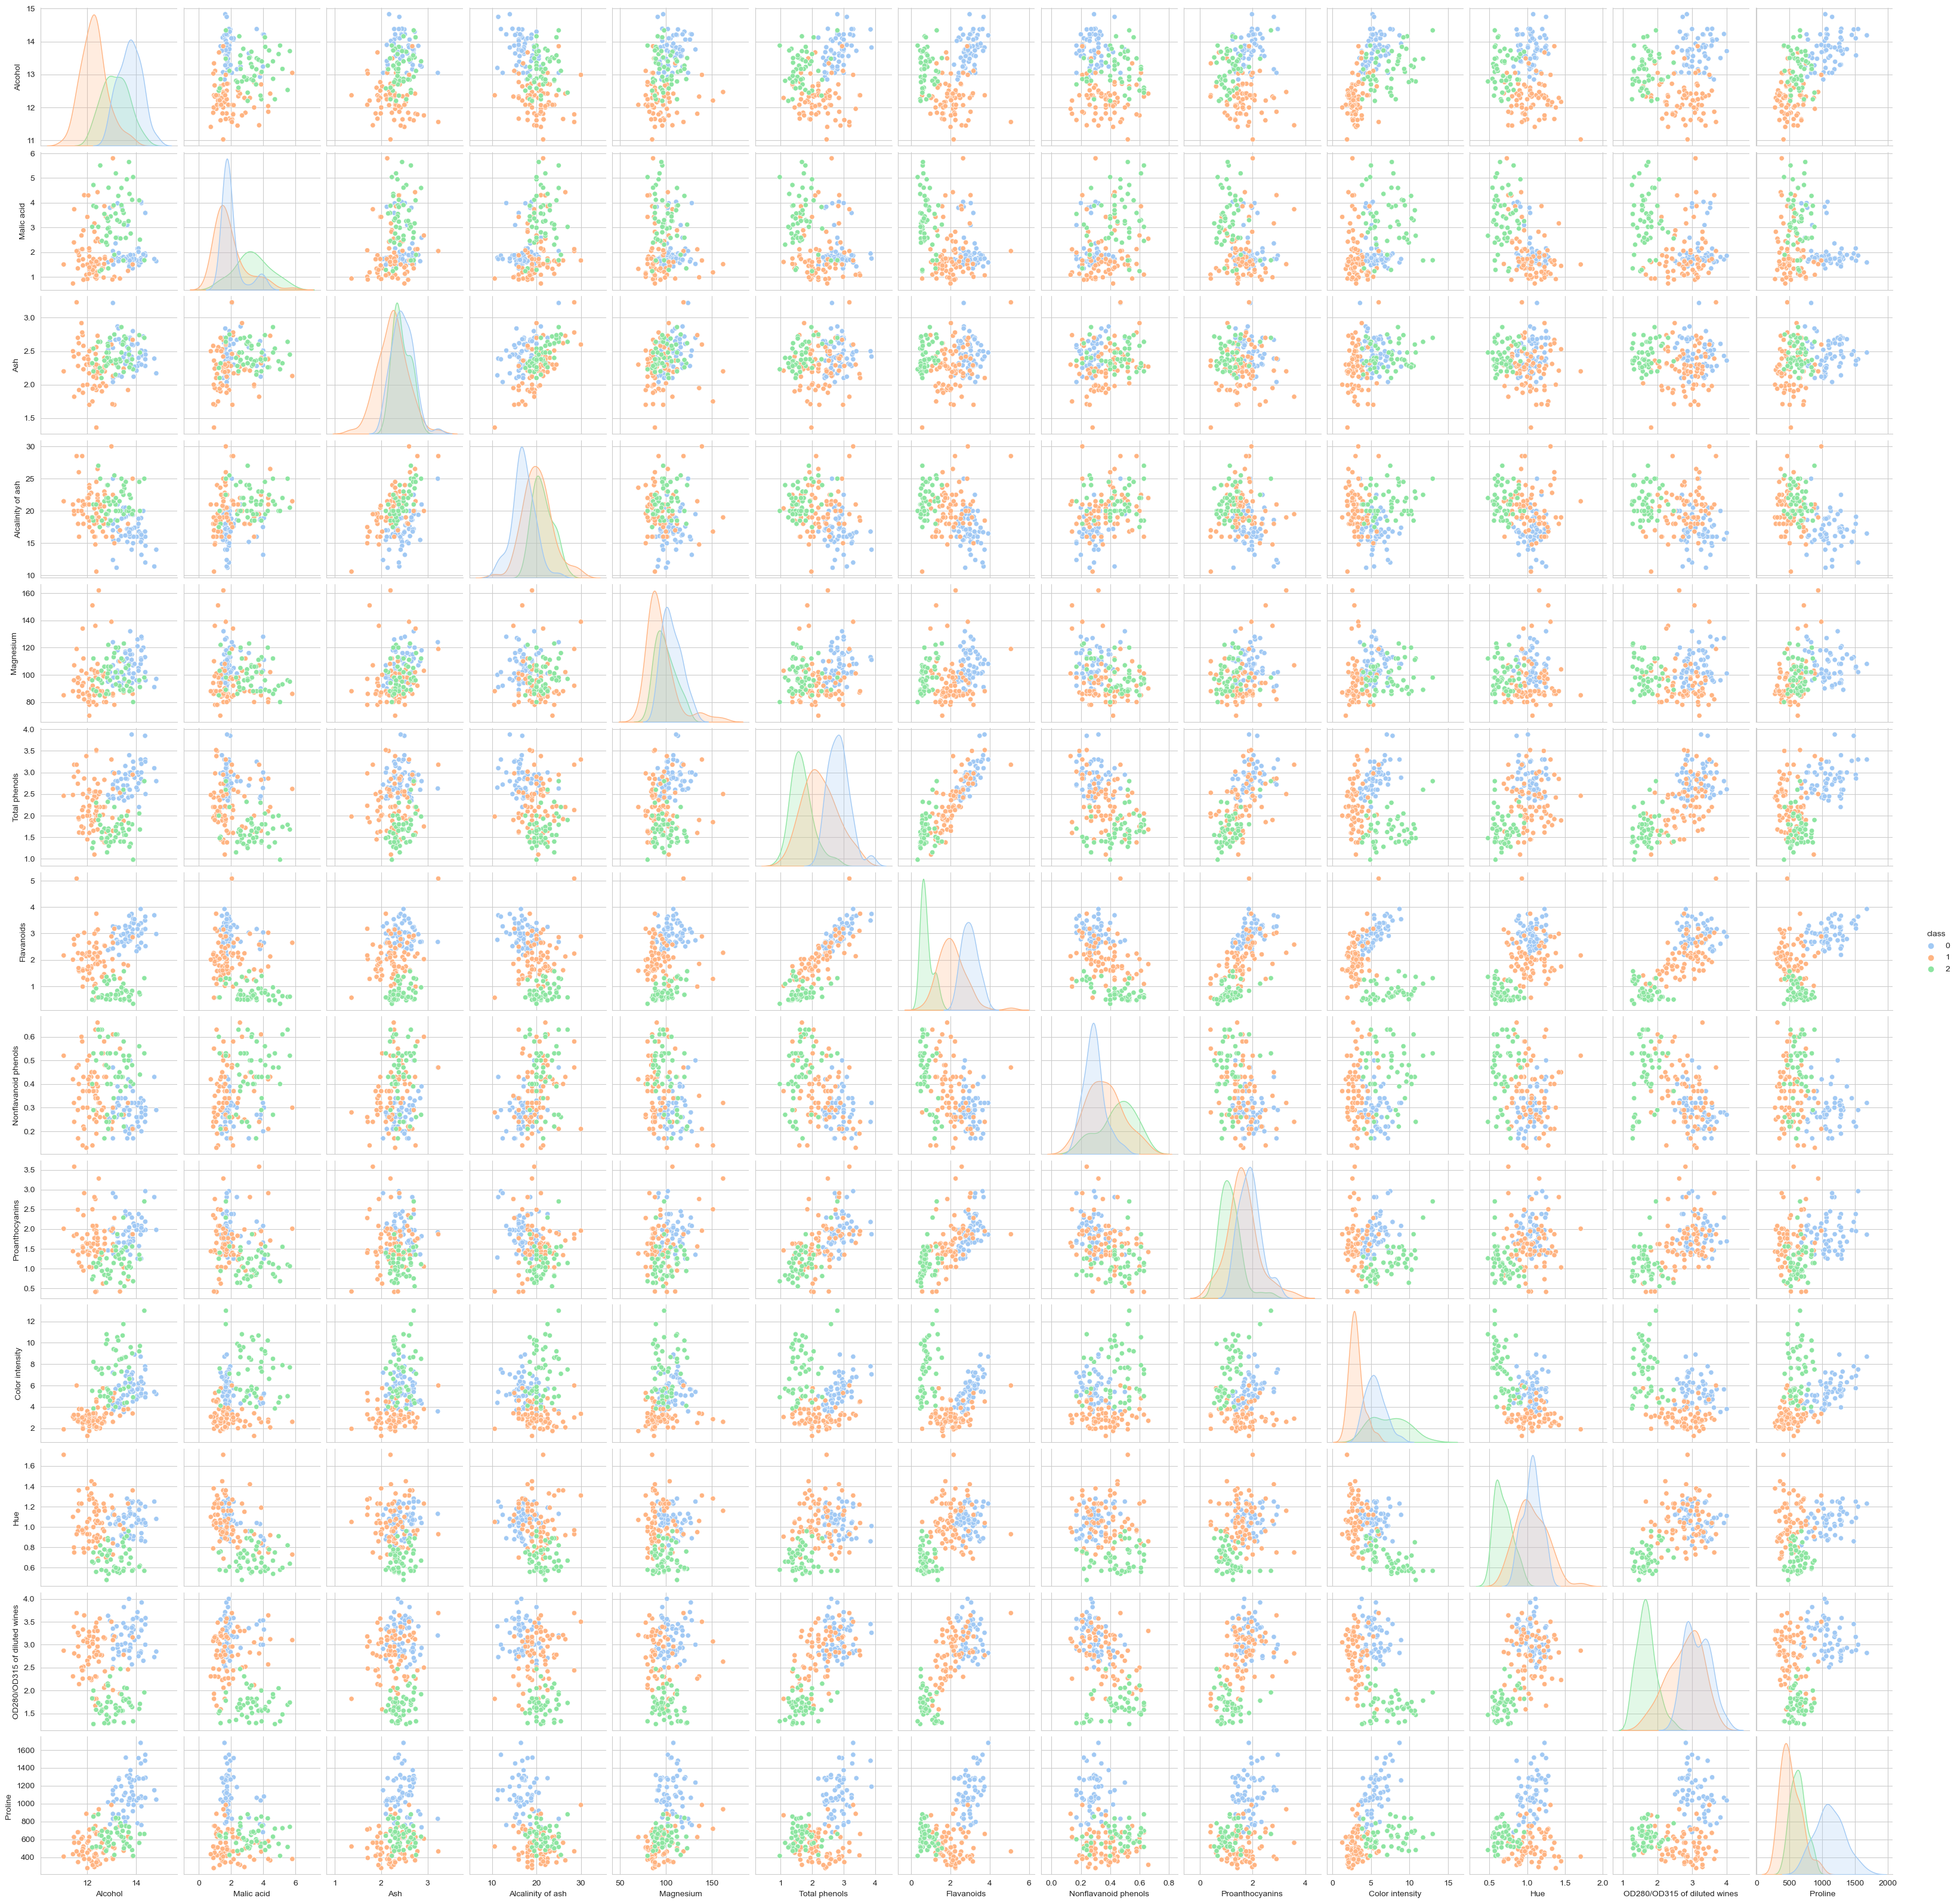

In [84]:
# Visualization of Correlations between Features Colored by Class
sns.pairplot(data, hue='class', palette='pastel')

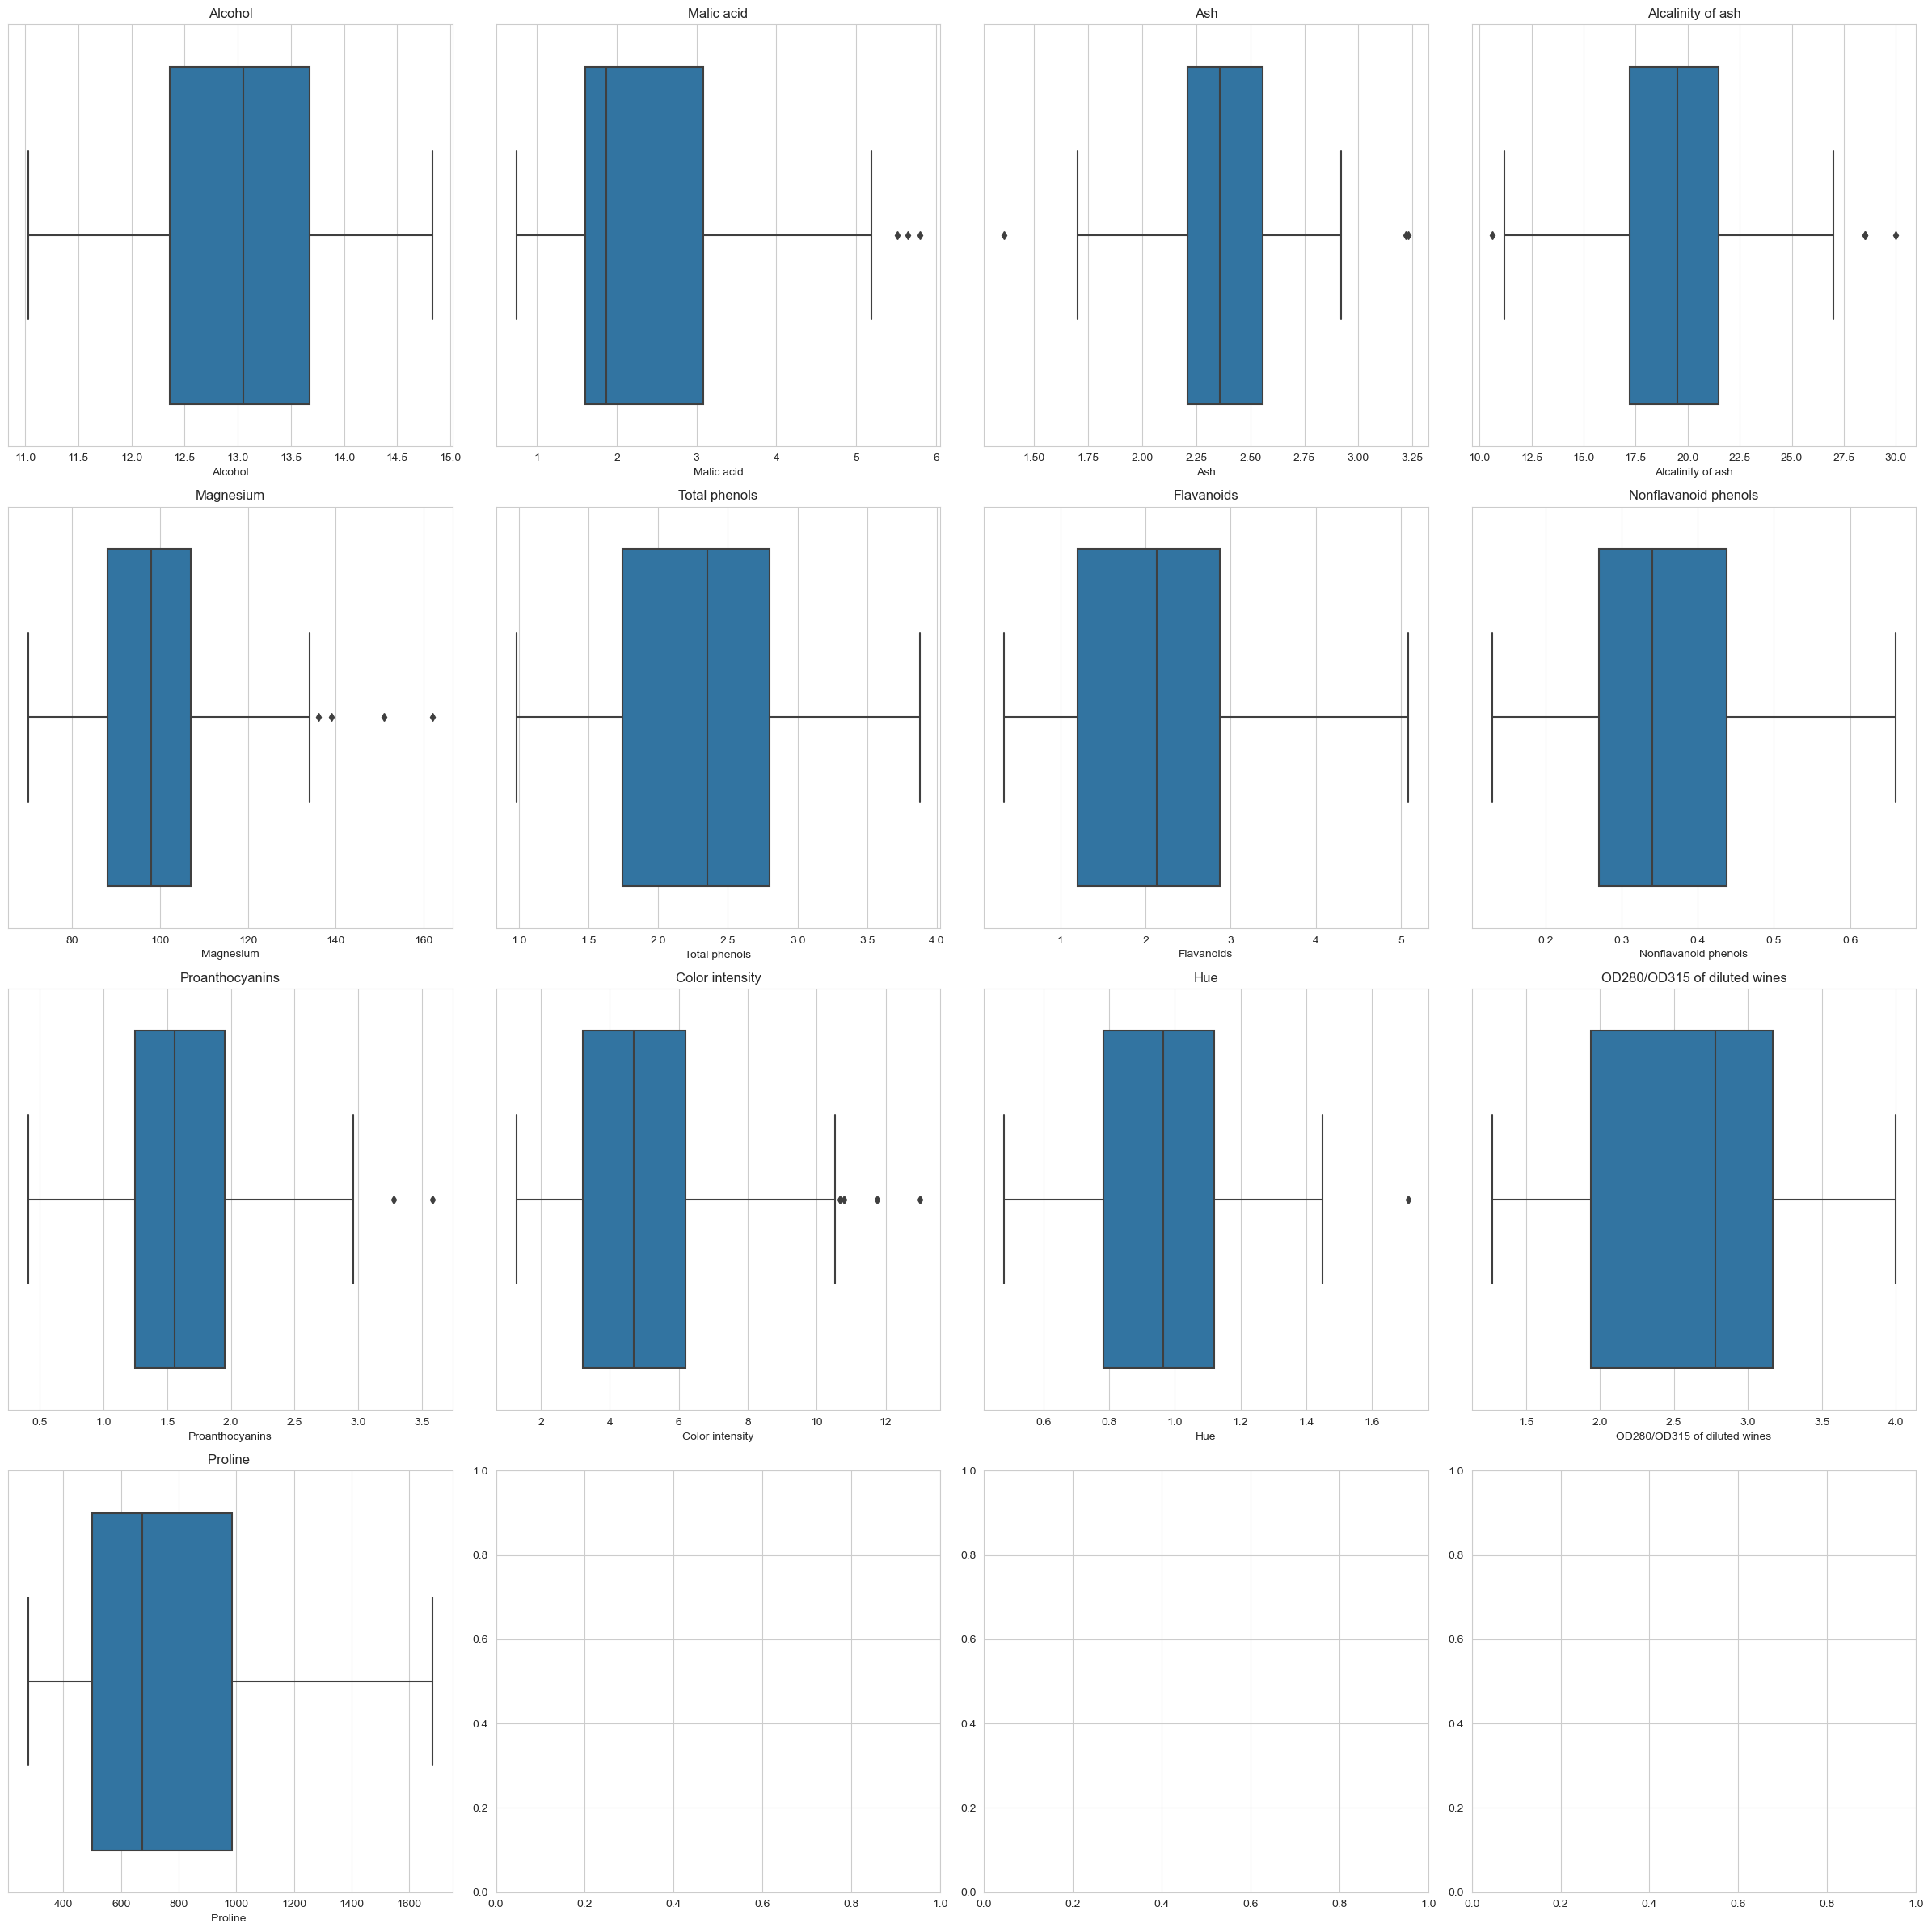

In [86]:
# Box Plots for Features to Determine Outliers
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (24,24))

for i, column in enumerate(X.columns):
    row = i // 4
    col = i % 4
    sns.boxplot(x=X[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [87]:
# IQR and Capping Method for Outlier Detection and Replacement

def replace_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1

    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)

    data.loc[(data[column]>upper_limit), column] = upper_limit
    data.loc[(data[column]<lower_limit), column] = lower_limit

    return data

In [88]:
# 7 Columns that need outliers replaced as seen on the box plots above

X_new = X.copy()

columns = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

for column in columns:
    replace_outlier(X_new, column)

In [89]:
# Now we are ready for splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [90]:
# Normalize and Scale data to compare with Raw Data performance

# Normalize
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

# Standardize
stand = StandardScaler()
X_train_stand = stand.fit_transform(X_train)
X_test_stand = stand.transform(X_test)

# Classifying Algorithms: Random Forest & Gradient Boost

In [91]:
# Random Forest - insensitive to the scale of features so we use the raw data
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
# Evaluate the Model
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



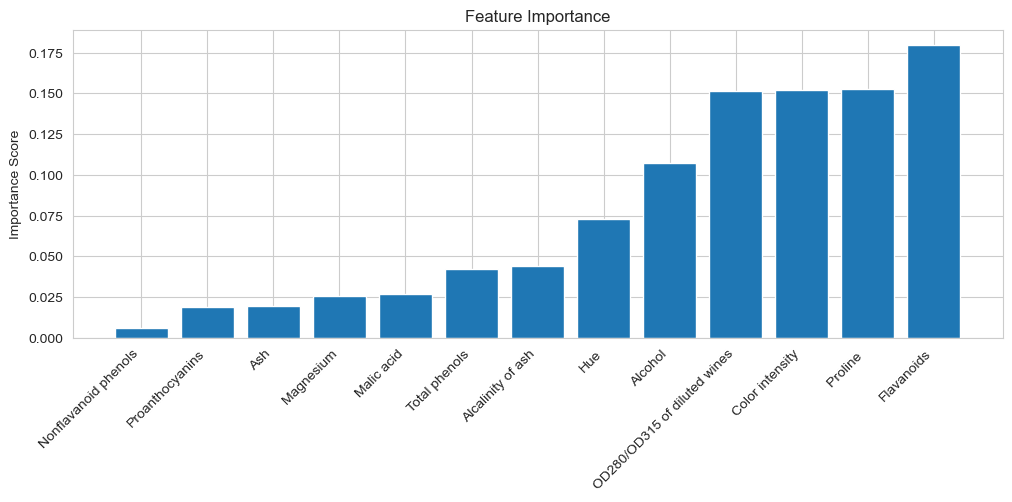

In [93]:
# Feature Importances Plot for Random Forest
feature_importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)
num_features = len(feature_importances)
ind = indices[-5:] # If would rather show just 5 most important features, replace indices with ind

plt.figure(figsize = (12,4))
plt.title('Feature Importance')
plt.bar(range(num_features), feature_importances[indices], align='center')
plt.xticks(range(num_features), [feature_names[i] for i in indices], rotation = 45, ha='right')
plt.ylabel('Importance Score')
plt.show()

In [94]:
# Gradient Boosting Algorithm using Normalized and Scaled Data

xg_n = GradientBoostingClassifier()
xg_s = GradientBoostingClassifier()

xg_n.fit(X_train_norm, y_train)
xg_s.fit(X_train_stand, y_train)

GradientBoostingClassifier()

In [95]:
# Evaluate the Normalized Data Model
y_p = xg_n.predict(X_test_norm)

acc = accuracy_score(y_test, y_p)
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_p))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [96]:
# Evaluate the Standardized Data Model
Y_p = xg_s.predict(X_test_stand)

Acc = accuracy_score(y_test, Y_p)
print('Accuracy: ', accuracy)
print(classification_report(y_test, Y_p))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



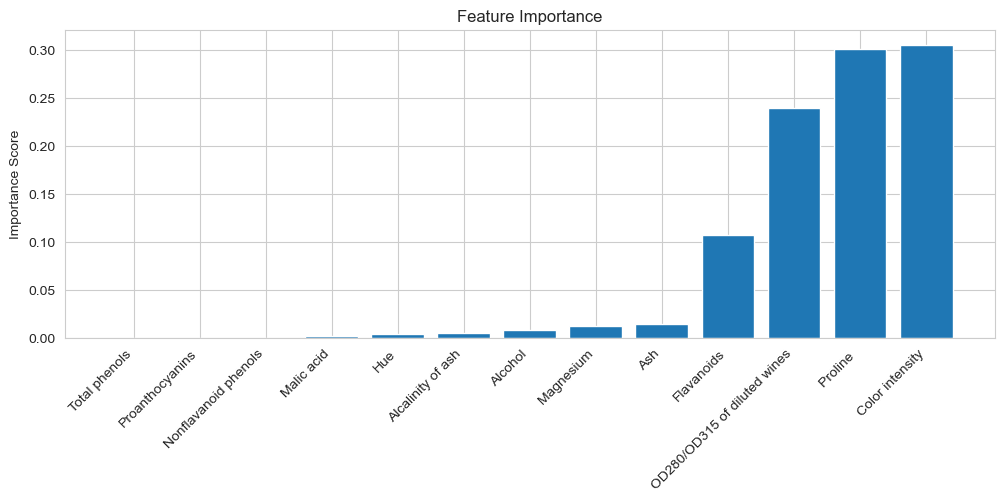

In [97]:
# Feature Importances Plot GradientBoost
feature_importances = xg_n.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)
num_features = len(feature_importances)
ind = indices[-5:] # If would rather show just 5 most important features, replace indices with ind

plt.figure(figsize = (12,4))
plt.title('Feature Importance')
plt.bar(range(num_features), feature_importances[indices], align='center')
plt.xticks(range(num_features), [feature_names[i] for i in indices], rotation = 45, ha='right')
plt.ylabel('Importance Score')
plt.show()

# Clustering Algorithms: KMeans & Spectral

In [98]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3)
cluster_data = data.loc[:,['OD280/OD315 of diluted wines', 'Proline ']]
X_scale = stand.fit_transform(cluster_data)

kmeans.fit(X_scale)

KMeans(n_clusters=3)

In [99]:
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

In [100]:
# Visualize Clusters
col_names = ['OD280/OD315 of diluted wines', 'Proline']

df = pd.DataFrame(X_scale, columns=col_names)
df.head(5)

OD280/OD315 of diluted wines   Proline
0                      1.847920  1.013009
1                      1.113449  0.965242
2                      0.788587  1.395148
3                      1.184071  2.334574
4                      0.449601 -0.037874

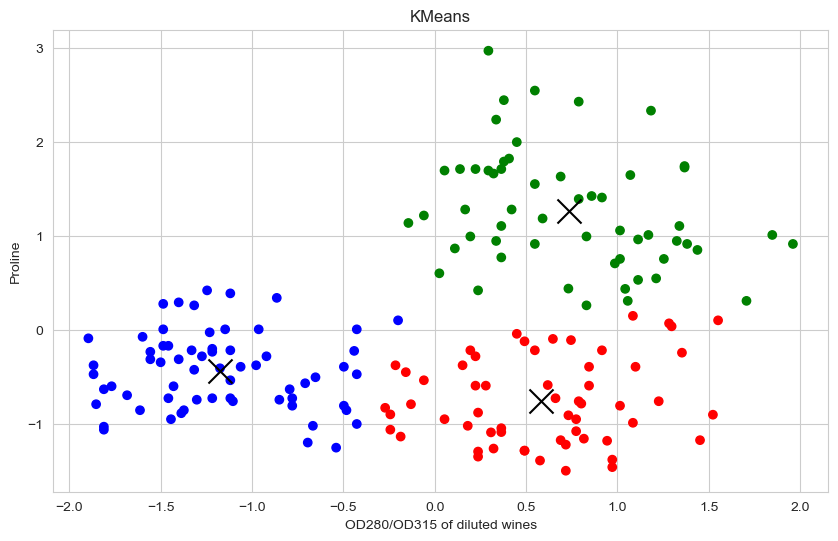

In [101]:
color_map = np.array(['r', 'g', 'b'])

plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'], df['Proline'], c = color_map[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c ='k')
plt.title('KMeans')
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Proline')
plt.show()

In [102]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='rbf')

spectral.fit(X_scale)

SpectralClustering(n_clusters=3)

In [103]:
Labels = spectral.fit_predict(X_scale)

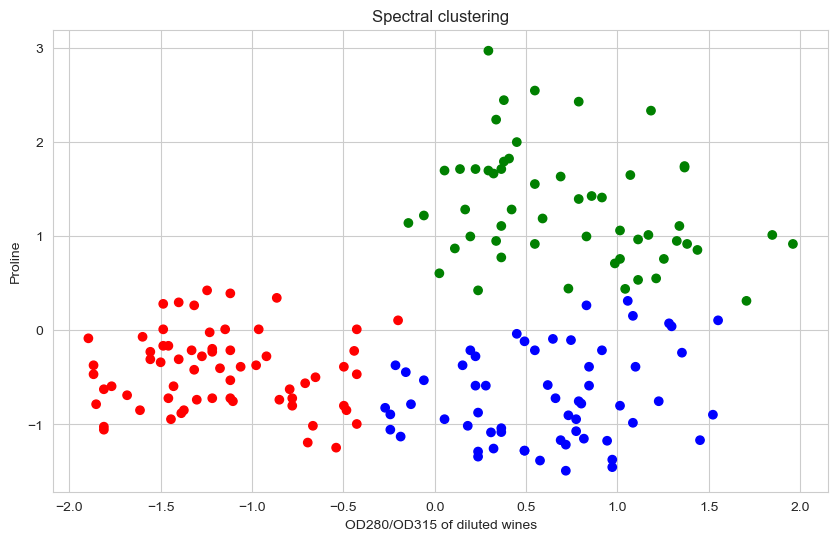

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'], df['Proline'], c = color_map[Labels])
plt.title('Spectral clustering')
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Proline')
plt.show()

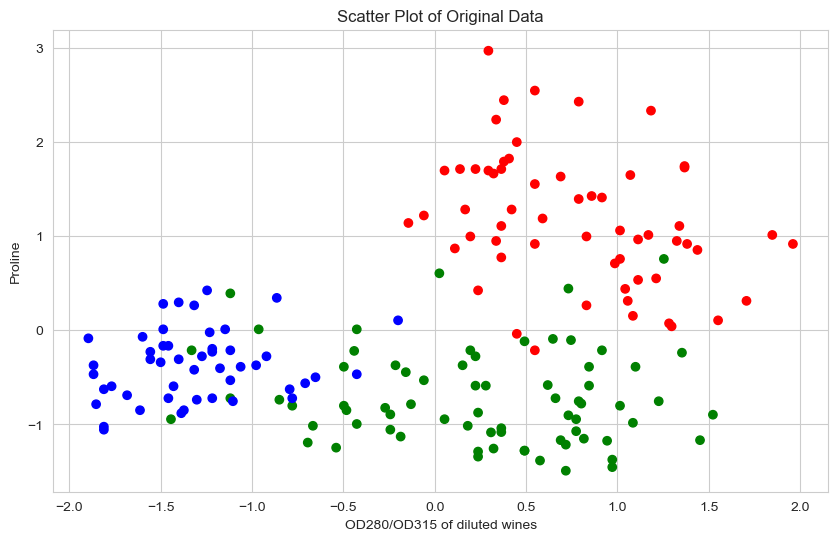

In [108]:
# Plot Scatter Using Absolute Truth Labels
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'], df['Proline'], c = color_map[y])
plt.title('Scatter Plot of Original Data')
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Proline')
plt.show()